<h1><center>Simple BankNote Classification using Naive Bayes classifier</center></h1>

### About Dataset

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

#### Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

### Import necessary packages

In [2]:
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import pandas as pd

### Read dataset
Mostly we read dataset using pandas, pandas is very good to read and also manipulate dataset of any format like in our example we are reading text file.

In [4]:
df = pd.read_csv('bank_note.txt')
df.head()

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


as we analyze the dataset, we came to know that first four columns are our __features__ and the last column represent classes to which we have classify, or another we can say that __class__ column is out target class.

Now Let's seperate the columns and put first four columns in __X___ variable and last column in __Y__ 

In [5]:
X= df.iloc[:,0:4].values
Y = df.iloc[:,-1].values

Now randomly seperate our dataset using __train_test_split__ library from __sklearn__, sole purpose of the seperation of dataset to test the accuracy after training our model.

As you see we use 4 parametes in __train_test_split__, first two parameters are features and target values which we set above in __X___ and __Y___ variable. 
The third parameter __test_size__ which we defined for how much test samples should be and in our case we define 30% of data will be our test data.
The last parameter __random_state__ as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case, benefit of using this parameter is whenever this command will execute it will split same samples into train and test variable. 

In [8]:
x_trn, x_tst, y_trn, y_tst = train_test_split(X, Y, test_size=0.3, random_state=42)

### Initialize and Train the Model
Here we are intializing the model, make object of it and train the model using fit method. __Fit__ method will be provided by model object which is __clf__ here.

__fit()__ method takes two parameters one is array of features which is __x_trn__ and other is array of target values which is __x_tst__. 

In [9]:
clf = GaussianNB()
clf.fit(x_trn, y_trn)

GaussianNB(priors=None)

### Prediction
Now it's time to predict the outputs, as remeber earlier we split data into train and test, now we will give test feature into predict function and save output into __predict_output__ variable.

In [10]:
predict_output = clf.predict(x_tst)

### Accuracy & Classification report
Now check the accuracy by using __accuracy_score__ library from sklearn, we use two parameters in __accuracy_score__ one is __original target values__ from test sample and other is __predict_output__ values to calculate the accuracy.

The classification report displays the precision, recall, F1, and support scores for the model.

__precision__: Precision is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

__recall__: Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

__f1-score__: The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

__support__: Support is the number of actual occurrences of the class in the specified dataset.

In [11]:
print("Accuracy is {0:.2f}%".format((accuracy_score(y_tst,predict_output)*100)))
print(classification_report(y_tst, predict_output))

Accuracy is 83.74%
             precision    recall  f1-score   support

          0       0.82      0.90      0.86       229
          1       0.86      0.75      0.80       183

avg / total       0.84      0.84      0.84       412



### How to save model

We are saving our trained model using __joblib__, because we will later use it during creating the Web API using python and Flask.

You have to pass the trained model object as a parameter and also the name of model you are going to save in hard drive as I write below __banknote_trained_model.sav__.

In [13]:
from sklearn.externals import joblib
joblib.dump(clf, 'banknote_trained_model.sav')

['banknote_trained_model.sav']

### Visualization using matplotlib

Visualize the results by taking two input features __Variance of Wavelet Transformed image__ and __Variance of Wavelet Transformed image__.

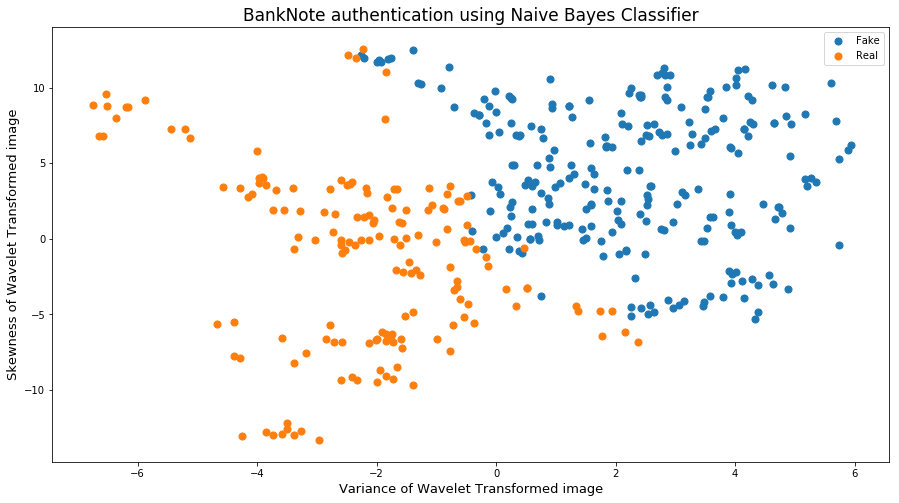

In [12]:
plt.figure(figsize=(15,8))
plt.scatter(x_tst[predict_output == 0,0], x_tst[predict_output== 0,1], s=50, label='Fake')
plt.scatter(x_tst[predict_output== 1,0], x_tst[predict_output == 1, 1], s=50, label='Real')
plt.title('BankNote authentication using Naive Bayes Classifier', size=17)
plt.xlabel('Variance of Wavelet Transformed image', size=13)
plt.ylabel('Variance of Wavelet Transformed image', size=13)
plt.legend()